# Decision Tree

In [1]:
import pandas as pd
import numpy as np

In [2]:
weather = pd.read_csv("weather.csv")

In [3]:
weather

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis?
0,D6,Rain,18,Normal,Strong,No
1,D7,Overcast,19,Normal,Strong,Yes
2,D5,Rain,20,Normal,Weak,Yes
3,D9,Sunny,21,Normal,Weak,Yes
4,D10,Rain,26,Normal,Weak,Yes
5,D11,Sunny,26,Normal,Strong,Yes
6,D8,Sunny,27,High,Weak,No
7,D12,Overcast,27,High,Strong,Yes
8,D4,Rain,28,High,Weak,Yes
9,D14,Rain,28,High,Strong,No


In [4]:
def calculate_entropy_split(temperature_threshold):
    first_partition, second_partition = weather[weather["Temperature"] <= temperature_threshold], weather[weather["Temperature"] > temperature_threshold]
    
    # Probability of each partition
    p_partition1 = first_partition.shape[0] / weather.shape[0]
    p_partition2 = second_partition.shape[0] / weather.shape[0]
    
    # Calculate probabilities of each class in each partition
    p_yes_partition1 = first_partition[first_partition["PlayTennis?"] == "Yes"].shape[0] / first_partition.shape[0]
    p_no_partition1 = 1 - p_yes_partition1
    
    p_yes_partition2 = second_partition[second_partition["PlayTennis?"] == "Yes"].shape[0] / second_partition.shape[0]
    p_no_partition2 = 1 - p_yes_partition2
    
    if p_yes_partition1 == 0 or p_no_partition1 == 0:
        mean_entropy_p1 = 0
    else:
        mean_entropy_p1 = -(p_yes_partition1 * np.log2(p_yes_partition1) + p_no_partition1 * np.log2(p_no_partition1))
    
    if p_yes_partition2 == 0 or p_no_partition2 == 0:
        mean_entropy_p2 = 0
    else:
        mean_entropy_p2 = -(p_yes_partition2 * np.log2(p_yes_partition2) + p_no_partition2 * np.log2(p_no_partition2))
    
    return p_partition1 * mean_entropy_p1 + p_partition2 * mean_entropy_p2

In [5]:
mean_entropy_first_split = calculate_entropy_split(temperature_threshold=18)

In [6]:
mean_entropy_first_split

0.8268850944895277

In [7]:
mean_entropy_second_split = calculate_entropy_split(temperature_threshold=19)

In [8]:
mean_entropy_second_split

0.9299678577609909

Using sklearn's Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
df = pd.read_csv('weather.csv')
df = df.drop("Day", axis = 1)

In [11]:
# Encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
features = encoder.fit_transform(df.drop('PlayTennis?', axis=1)).toarray()

In [12]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy")

In [13]:
# Fit the classifier to the training data
clf.fit(features, df['PlayTennis?'])

DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.score(features, df["PlayTennis?"])

1.0

The rest of the homework is to show the tree, which is pretty hard. So fuck it.

# Instance Base Learning

In [15]:
from sklearn.cluster import KMeans

In [16]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from kneed import KneeLocator

In [17]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [18]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [19]:
df = df[["Income", "Recency"]].dropna()

In [20]:
df

,Income,Recency
0,58138.0,58
1,46344.0,38
2,71613.0,26
3,26646.0,26
4,58293.0,94
...,...,...
2235,61223.0,46
2236,64014.0,56
2237,56981.0,91
2238,69245.0,8


## No norm

In [21]:
X = np.array(list(zip(df["Income"], df["Recency"])))

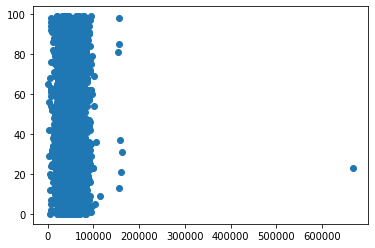

In [22]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Finding clusters number

In [23]:
K = range(1, 10)
distortions = []
inertias = []

mapping1 = {}
mapping2 = {}

In [24]:
for k in K:
    model = KMeans(n_clusters = k).fit(X)
    
    distortions.append(np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X))
    inertias.append(model.inertia_)
                       
    mapping1[k] = np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X)
    mapping2[k] = model.inertia_                   

In [25]:
kneedle_distortions = KneeLocator(K, distortions, curve="convex", direction="decreasing")

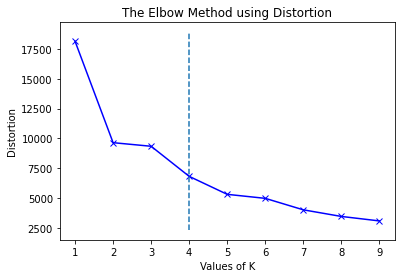

In [26]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.vlines(kneedle_distortions.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Distortion')
plt.show()

In [27]:
kmean_model = KMeans(n_clusters = kneedle_distortions.knee).fit(X)

In [28]:
distortion_values = []

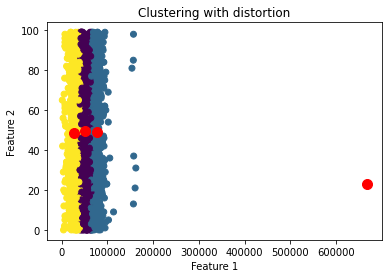

In [29]:
y_kmeans = kmean_model.fit_predict(X)
distortion_values.append(kmean_model.inertia_)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with distortion")
plt.show()

In [30]:
inertias_kneedle = KneeLocator(K, inertias, curve="convex", direction="decreasing")

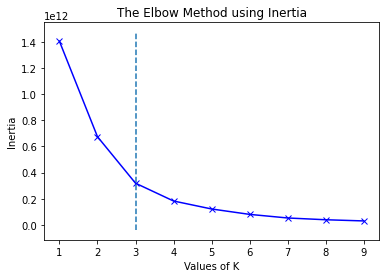

In [31]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.vlines(inertias_kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Inertia')
plt.show()

In [32]:
kmean_model = KMeans(n_clusters = inertias_kneedle.knee).fit(X)

In [33]:
inertia_values = []

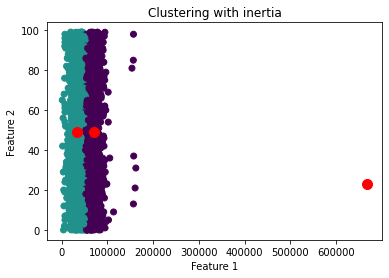

In [34]:
y_kmeans = kmean_model.fit_predict(X)
inertia_values.append(kmean_model.inertia_)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with inertia")
plt.show()

So basically there are some "strange" relationship between the "income" and the "recency". We can now start "normalizing" it.

## Z-score norm

$$
X_{norm} = \frac{X - \mu(X)}{\sigma(X)}
$$

In [35]:
df

,Income,Recency
0,58138.0,58
1,46344.0,38
2,71613.0,26
3,26646.0,26
4,58293.0,94
...,...,...
2235,61223.0,46
2236,64014.0,56
2237,56981.0,91
2238,69245.0,8


In [36]:
income = df["Income"]
recency = df["Recency"]

In [37]:
mean_income = income.mean()
std_income = income.std()
mean_recency = recency.mean()
std_recency = recency.std()

In [38]:
normalized_income = (income - mean_income) / std_income
normalized_recency = (recency - mean_recency) / std_recency

In [39]:
X = np.array(list(zip(normalized_income, normalized_recency)))

In [40]:
X

array([[ 0.23400988,  0.31046205],
       [-0.23450655, -0.38042357],
       [ 0.769304  , -0.79495495],
       ...,
       [ 0.18804808,  1.45042333],
       [ 0.67523525, -1.41675201],
       [ 0.02469895, -0.31133501]])

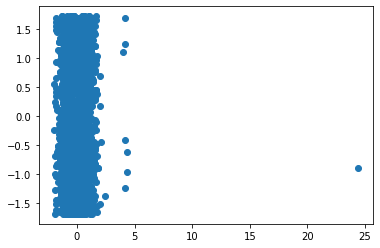

In [41]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [42]:
K = range(1, 10)
distortions = []
inertias = []

mapping1 = {}
mapping2 = {}

In [43]:
for k in K:
    model = KMeans(n_clusters = k).fit(X)
    
    distortions.append(np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X))
    inertias.append(model.inertia_)
                       
    mapping1[k] = np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X)
    mapping2[k] = model.inertia_                   

In [44]:
kneedle_distortions = KneeLocator(K, distortions, curve="convex", direction="decreasing")

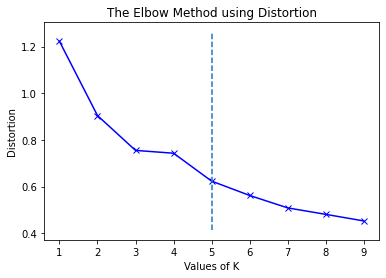

In [45]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.vlines(kneedle_distortions.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Distortion')
plt.show()

In [46]:
kmean_model = KMeans(n_clusters = kneedle_distortions.knee).fit(X)

In [47]:
distortion_values = []

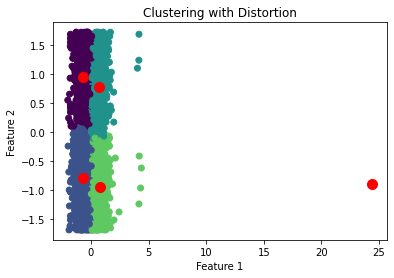

In [48]:
y_kmeans = kmean_model.fit_predict(X)
distortion_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with Distortion")
plt.show()

In [49]:
kneedle_inertias = KneeLocator(K, inertias, curve="convex", direction="decreasing")

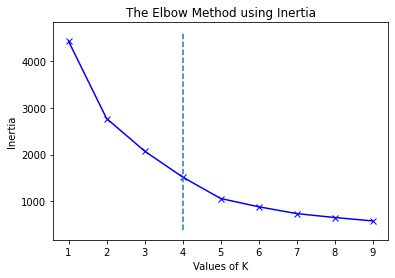

In [50]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.vlines(kneedle_inertias.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Inertia')
plt.show()

In [51]:
kmean_model = KMeans(n_clusters = kneedle_inertias.knee).fit(X)

In [52]:
inertia_values = []

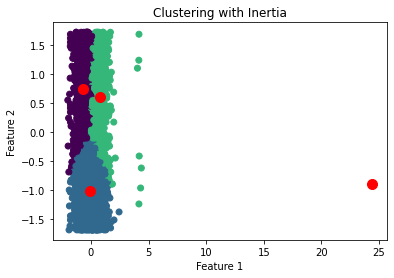

In [53]:
y_kmeans = kmean_model.fit_predict(X)
inertia_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with Inertia")
plt.show()

## Min-max norm

$$
X_{norm} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

In [54]:
min_income = income.min()
max_income = income.max()
min_recency = recency.min()
max_recency = recency.max()

In [55]:
normalized_income = (income - min_income) / (max_income - min_income)
normalized_recency = (recency - min_recency) / (max_recency - min_recency)

In [56]:
X = np.array(list(zip(normalized_income, normalized_recency)))

In [57]:
X

array([[0.08483222, 0.58585859],
       [0.06709518, 0.38383838],
       [0.10509733, 0.26262626],
       ...,
       [0.08309221, 0.91919192],
       [0.10153609, 0.08080808],
       [0.07690815, 0.4040404 ]])

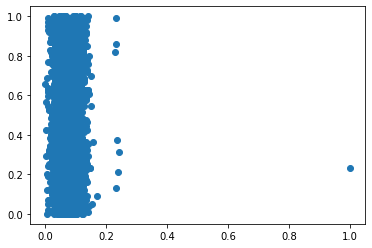

In [58]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [59]:
K = range(1, 10)
distortions = []
inertias = []

mapping1 = {}
mapping2 = {}

In [60]:
for k in K:
    model = KMeans(n_clusters = k).fit(X)
    
    distortions.append(np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X))
    inertias.append(model.inertia_)
                       
    mapping1[k] = np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X)
    mapping2[k] = model.inertia_                   

In [61]:
kneedle_distortions = KneeLocator(K, distortions, curve="convex", direction="decreasing")

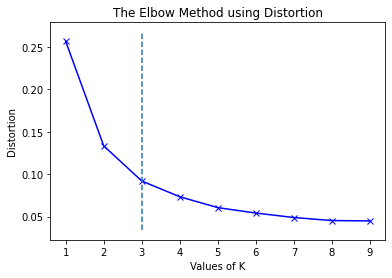

In [62]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.vlines(kneedle_distortions.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Distortion')
plt.show()

In [63]:
kmean_model = KMeans(n_clusters = kneedle_distortions.knee).fit(X)

In [64]:
distortion_values = []

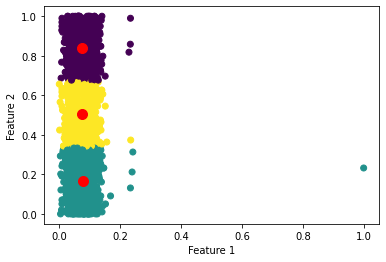

In [65]:
y_kmeans = kmean_model.fit_predict(X)
distortion_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [66]:
kneedle_inertias = KneeLocator(K, inertias, curve="convex", direction="decreasing")

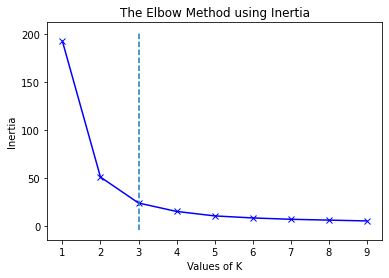

In [67]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.vlines(kneedle_inertias.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Inertia')
plt.show()

In [68]:
kmean_model = KMeans(n_clusters = kneedle_inertias.knee).fit(X)

In [69]:
inertia_values = []

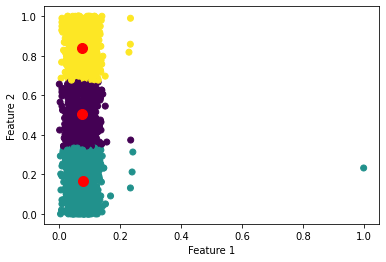

In [70]:
y_kmeans = kmean_model.fit_predict(X)
inertia_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Log-norm

$$
X_{norm} = \log(X)
$$

In [71]:
normalized_income = np.log10(income + 1e-1)
normalized_recency = np.log10(recency + 1e-1)

In [72]:
X = np.array(list(zip(normalized_income, normalized_recency)))

In [73]:
X

array([[4.76446083, 1.76417613],
       [4.66599445, 1.58092498],
       [4.85499247, 1.41664051],
       ...,
       [4.75573083, 1.95951838],
       [4.84038905, 0.90848502],
       [4.72320192, 1.60314437]])

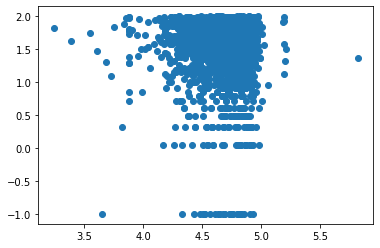

In [74]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [75]:
K = range(1, 10)
distortions = []
inertias = []

mapping1 = {}
mapping2 = {}

In [76]:
for k in K:
    model = KMeans(n_clusters = k).fit(X)
    
    distortions.append(np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X))
    inertias.append(model.inertia_)
                       
    mapping1[k] = np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X)
    mapping2[k] = model.inertia_                   

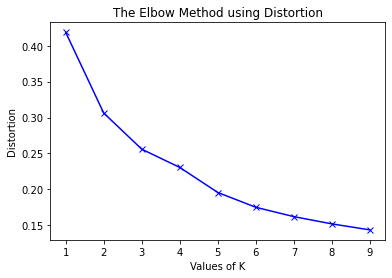

In [77]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [78]:
kneedle = KneeLocator(K, inertias, curve="convex", direction="decreasing")

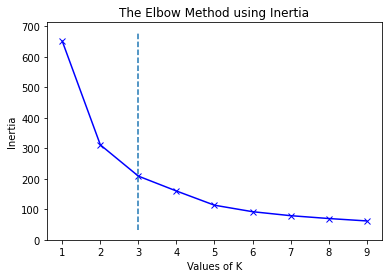

In [79]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Inertia')
plt.show()

In [80]:
kmean_model = KMeans(n_clusters = kneedle.knee).fit(X)

In [81]:
inertia_values = []

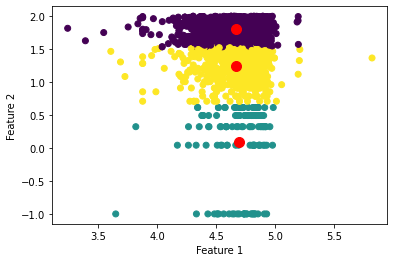

In [82]:
y_kmeans = kmean_model.fit_predict(X)
inertia_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Reciprocal-norm

$$
X_{norm} = \frac{X}{\sum_{x \in X}x}
$$

In [83]:
normalized_income = income / np.sum(income)
normalized_recency = recency / np.sum(recency)

In [84]:
X = np.array(list(zip(normalized_income, normalized_recency)))

In [85]:
X

array([[5.02142388e-04, 5.34010975e-04],
       [4.00276701e-04, 3.49869259e-04],
       [6.18527002e-04, 2.39384230e-04],
       ...,
       [4.92149290e-04, 8.37844805e-04],
       [5.98074403e-04, 7.36566862e-05],
       [4.56633629e-04, 3.68283431e-04]])

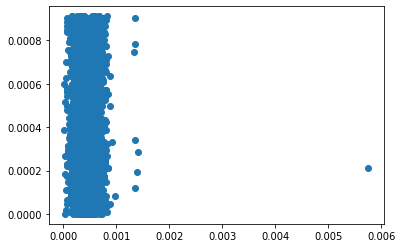

In [86]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [87]:
K = range(1, 10)
distortions = []
inertias = []

mapping1 = {}
mapping2 = {}

In [88]:
for k in K:
    model = KMeans(n_clusters = k).fit(X)
    
    distortions.append(np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X))
    inertias.append(model.inertia_)
                       
    mapping1[k] = np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X)
    mapping2[k] = model.inertia_                   

In [89]:
kneedle_distortions = KneeLocator(K, distortions, curve="convex", direction="decreasing")

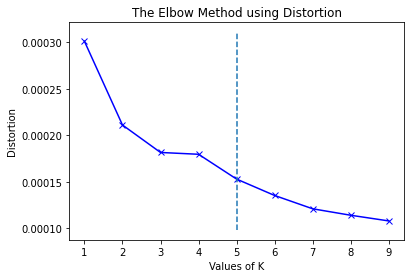

In [90]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.vlines(kneedle_distortions.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Distortion')
plt.show()

In [91]:
kmean_model = KMeans(n_clusters = kneedle_distortions.knee).fit(X)

In [92]:
distortion_values = []

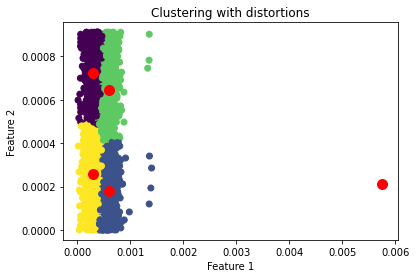

In [93]:
y_kmeans = kmean_model.fit_predict(X)
distortion_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with distortions")
plt.show()

In [94]:
kneedle_inertias = KneeLocator(K, inertias, curve="convex", direction="decreasing")

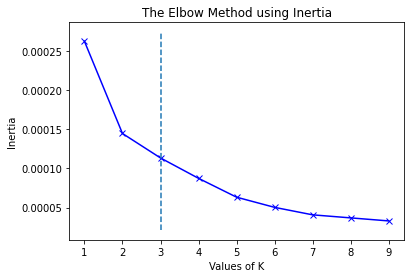

In [95]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.vlines(kneedle_inertias.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Inertia')
plt.show()

In [96]:
kmean_model = KMeans(n_clusters = kneedle_inertias.knee).fit(X)

In [97]:
inertia_values = []

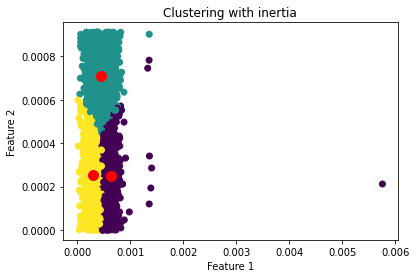

In [98]:
y_kmeans = kmean_model.fit_predict(X)
inertia_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with inertia")
plt.show()

## Log-norm

$$
X_{norm} = \log(X)
$$

In [99]:
normalized_income = np.log10(income + 1e-1)
normalized_recency = np.log10(recency + 1e-1)

In [100]:
X = np.array(list(zip(normalized_income, normalized_recency)))

In [101]:
X

array([[4.76446083, 1.76417613],
       [4.66599445, 1.58092498],
       [4.85499247, 1.41664051],
       ...,
       [4.75573083, 1.95951838],
       [4.84038905, 0.90848502],
       [4.72320192, 1.60314437]])

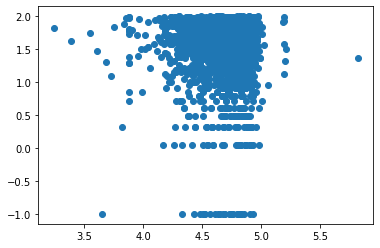

In [102]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [103]:
K = range(1, 10)
distortions = []
inertias = []

mapping1 = {}
mapping2 = {}

In [104]:
for k in K:
    model = KMeans(n_clusters = k).fit(X)
    
    distortions.append(np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X))
    inertias.append(model.inertia_)
                       
    mapping1[k] = np.sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / len(X)
    mapping2[k] = model.inertia_                   

In [105]:
kneedle_distortions = KneeLocator(K, distortions, curve="convex", direction="decreasing")

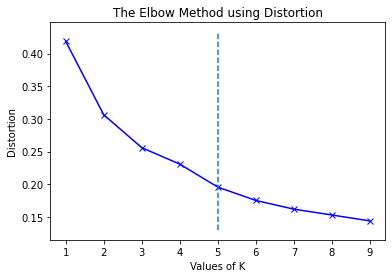

In [106]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.vlines(kneedle_distortions.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Distortion')
plt.show()

In [107]:
kmean_model = KMeans(n_clusters = kneedle_distortions.knee).fit(X)

In [108]:
distortion_values = []

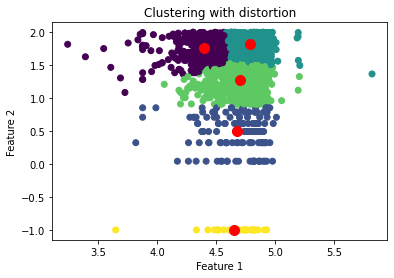

In [109]:
y_kmeans = kmean_model.fit_predict(X)
distortion_values.append(kmean_model.inertia_)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Clustering with distortion")
plt.show()

In [110]:
kneedle_innertias = KneeLocator(K, inertias, curve="convex", direction="decreasing")

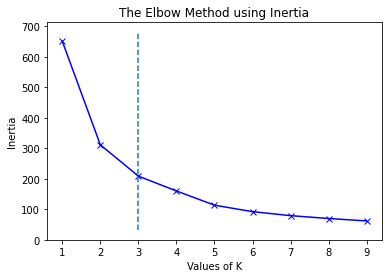

In [111]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.vlines(kneedle_innertias.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('The Elbow Method using Inertia')
plt.show()

In [112]:
kmean_model = KMeans(n_clusters = kneedle_innertias.knee).fit(X)

In [113]:
inertia_values = []

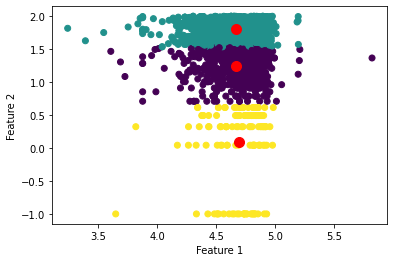

In [114]:
y_kmeans = kmean_model.fit_predict(X)
inertia_values.append(kmean_model.inertia_)
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_kmeans)
plt.scatter(kmean_model.cluster_centers_[:, 0],\
            kmean_model.cluster_centers_[:, 1], \
            s=100, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()